<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Phillip/TechLabs__finalProject_interactive_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TechLabs final project 
## (Problem 2 - Group 8)

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya, Alejandro Echavarria and Marco Stoever

---

# Data Preparation

### libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
countries_csv_url = 'https://raw.githubusercontent.com/rechavar/pyCovid_TechLabsProj/master/countries.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [0]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)
df_countries = pd.read_csv(countries_csv_url)

In [0]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81


In [0]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4


In [0]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,930,938,996,1040,1075,1097,1128,1138,1209,1259
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,758,771,777,783,789,795,803,812,823,851
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,639,652,653,653,663,676,676,681,684
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,18,18,18,18,18,18,18


In [0]:
pd.set_option('display.max_rows', 300)

print(df_confirmed.iloc[:,1:2])
print(df_death.iloc[:,1:2])
print(df_recovered.iloc[:,1:2])

#Taiwan is written with an asterisk (*) at the end, we have to change this:
#We also want to have "USA" instead of "US":
#Congo (Brazzaville) and Congo (Kinshasa) are capitals of different countries!
#Brazzaville -> Republic of the Congo || Kinshasa -> Democratic Republic of the Congo

#We will change this in the data cleaning part

                       Country/Region
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                           Australia
10                          Australia
11                          Australia
12                          Australia
13                          Australia
14                          Australia
15                          Australia
16                            Austria
17                         Azerbaijan
18                            Bahamas
19                            Bahrain
20                         Bangladesh
21                           Barbados
22                            Belarus
23                            Belgium
24                              Benin
25          

In [0]:
#reset max_rows displayed to default number (10):
pd.set_option('display.max_rows', 10)

In [0]:
all_dataframes = {'confirmed': df_confirmed,
                  'death': df_death,
                  'recovered': df_recovered,
                  'countries': df_countries}

### Data Cleaning

In [0]:
for key, df in all_dataframes.items():
  print('cleaning: {}'.format(key))

  if key == 'countries':
    continue

  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)

  #Grouping together countries originally split into multiple Provinces/States
  #(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
  df = df.groupby(by = df.index, axis = 0).sum()

  # Addition of a "global" row
  df.loc['Global'] = df.sum(axis=0)

  #transpose
  df=df.T
  df.rename_axis(index='Date', columns="Country",inplace=True)
  df.index = pd.to_datetime(df.index)

  #Naming the Date index:
  df.index.rename("Date", inplace= True)

  #Creating a datetime index:
  df.index = pd.to_datetime(df.index)
  
  #Save new dataFrame
  all_dataframes[key] = df

# Change country names in df_countries
old_names = [ 'Myanmar [Burma]', 'Cape Verde',  "C?te d'Ivoire", 'Czech Republic',
             'Congo [DRC]',  'Swaziland', 'Vatican City',  'South Korea', 'Macedonia [FYROM]',
              'Congo [Republic]',  'S?o Tom? and Pr?ncipe',  'United States',  'Gaza Strip','Sudan']

new_names = ['Burma', 'Cabo Verde', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of the Congo',
              'Eswatini',  'Holy See',  'Korea, South',  'North Macedonia',  'Republic of the Congo',
             'Sao Tome and Principe', 'USA',  'West Bank and Gaza','South Sudan']

all_dataframes['countries'] = all_dataframes['countries'].replace(old_names, new_names)

cleaning: confirmed
cleaning: death
cleaning: recovered
cleaning: countries


In [0]:
all_dataframes['confirmed']
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25,11173,1004,8503,763,70,25,12628,7113,7126,16539,...,787,3189,1177,326,423,9,233,920,56,5495061
2020-05-26,11831,1029,8697,763,70,25,13228,7402,7139,16557,...,789,3290,1211,327,429,9,249,920,56,5589626
2020-05-27,12456,1050,8857,763,71,25,13933,7774,7150,16591,...,803,3369,1245,327,434,9,256,1057,132,5691790


### New Dataframe: Active Cases

In [0]:
all_dataframes['active'] = all_dataframes['confirmed'] - all_dataframes['recovered'] - all_dataframes['death']

## Calculating Projections (Marco)

In [0]:
def create_country(country):
  country_confirmed=all_dataframes["confirmed"].loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in all_dataframes["confirmed"].columns}

In [0]:
from datetime import timedelta

def create_projection(country):
  
  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=21, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]
  
    
  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']
         
  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
    
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
        
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in all_dataframes["confirmed"].columns}

In [0]:
def add_more_projections(country):
  projection_dataframes[country]['Death Cases']=all_dataframes['death'][country]
  projection_dataframes[country]['Recovered Cases']=all_dataframes['recovered'][country]
  projection_dataframes[country]['Active Cases']=(projection_dataframes[country]['Total Cases']
                                                    -projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Recovered Cases'])
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))

  Recovered_Rate=projection_dataframes[country]['Recovered Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()
  Death_Rate=projection_dataframes[country]['Death Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()

  for date in projection_dataframes[country].index:
      if projection_dataframes[country].loc[date, 'Prediction']:
        projection_dataframes[country].loc[date, 'Recovered Cases']=(Recovered_Rate*projection_dataframes[country].shift(1).loc[date, 'Active Cases']
                                                                       +projection_dataframes[country].shift(1).loc[date, 'Recovered Cases'])
        projection_dataframes[country].loc[date, 'Death Cases']=(Death_Rate*projection_dataframes[country].shift(21).loc[date, 'New Cases']
                                                                   +projection_dataframes[country].shift(1).loc[date, 'Death Cases'])
        projection_dataframes[country].loc[date, 'Active Cases']=(projection_dataframes[country].loc[date, 'Total Cases']
                                                                    -projection_dataframes[country].loc[date, 'Recovered Cases']
                                                                    -projection_dataframes[country].loc[date, 'Death Cases'])
      
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))  
                                                                 
for country in all_dataframes["confirmed"].columns:
  add_more_projections(country)

## Machine Learning (Alejandro)

In [0]:
#conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Phillip\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    convertdate-2.2.1          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.2            |     pyh9f0ad1d_0          59 KB  conda-forge
    korean_lunar_calendar-0.2.1|     pyh9f0ad1d_0          10 KB  conda-forge
    libpython-2.0              |           py37_0          47 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB
    m2w64-bzip2-1.0.6          |                6         100 KB
    m2w64-crt-git-5.0.0.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from fbprophet import Prophet

In [0]:
countrywise = pd.DataFrame()
countrywise['Country'] = all_dataframes['confirmed'].columns
countrywise = countrywise.set_index('Country')
countrywise['Confirmed'] = all_dataframes['confirmed'].iloc[-1,:]
countrywise['Death'] = all_dataframes['death'].iloc[-1,:]
countrywise['Recovered'] = all_dataframes['recovered'].iloc[-1,:]
countrywise['Active'] = all_dataframes['active'].iloc[-1,:]
countrywise.head()

,Confirmed,Death,Recovered,Active
Country,,,,
Afghanistan,13659,246,1259,12154
Albania,1099,33,851,215
Algeria,9134,638,5422,3074
Andorra,764,51,684,29
Angola,81,4,18,59


In [0]:
countrywise['Mortality'] = (countrywise['Death']/countrywise['Confirmed'])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise['Survival porbability'] = 100 - countrywise['Mortality']

In [0]:
datewise = pd.DataFrame()
datewise['Date'] = all_dataframes['active'].index
datewise['Recovered'] = all_dataframes['recovered']['Global'].values
datewise['Confirmed'] = all_dataframes['confirmed']['Global'].values
datewise['Death'] = all_dataframes['death']['Global'].values
datewise['Active'] = all_dataframes['active']['Global'].values
datewise['Closed'] = datewise['Recovered'] + datewise['Death']
datewise = datewise.set_index('Date')

In [0]:
datewise['Mortality'] = datewise['Death']/datewise['Confirmed']*100
datewise['Recovery'] = datewise['Recovered']/datewise['Confirmed']*100
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery
Date,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045
2020-01-23,30,654,18,606,48,2.752294,4.587156
2020-01-24,36,941,26,879,62,2.763018,3.825717
2020-01-25,39,1434,42,1353,81,2.928870,2.719665
2020-01-26,52,2118,56,2010,108,2.644004,2.455146
...,...,...,...,...,...,...,...
2020-05-25,2231738,5495061,346231,2917092,2577969,6.300767,40.613525
2020-05-26,2286956,5589626,350452,2952218,2637408,6.269686,40.914294
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085


In [0]:
datewise['Days since'] = datewise.index-datewise.index[0]
datewise['Days since'] = datewise["Days since"].dt.days
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery,Days since
Date,,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045,0
2020-01-23,30,654,18,606,48,2.752294,4.587156,1
2020-01-24,36,941,26,879,62,2.763018,3.825717,2
2020-01-25,39,1434,42,1353,81,2.928870,2.719665,3
2020-01-26,52,2118,56,2010,108,2.644004,2.455146,4
...,...,...,...,...,...,...,...,...
2020-05-25,2231738,5495061,346231,2917092,2577969,6.300767,40.613525,124
2020-05-26,2286956,5589626,350452,2952218,2637408,6.269686,40.914294,125
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085,126


### Predictions using ML models (Alejandro)

In [0]:
train = datewise.iloc[:int(datewise.shape[0] * 0.90)]
val = datewise.iloc[int(datewise.shape[0] * 0.90):]
models = {}

Linear Regression

In [0]:
lin_reg = LinearRegression(normalize= True)
lin_reg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = lin_reg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_lin = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error : ', rmse_lin)

Error :  1624889.9031489003


In [0]:
def plot_model(X, y, y_hat, title):

  plt.figure(figsize=(10,8))
  plt.plot(X, y, color = 'b', label = 'Confirmed cases')
  plt.plot(X, y_hat, color = 'r', label = 'Confirmed predicted cases')
  plt.legend(loc = 'best')
  plt.grid()
  plt.title(title)
  plt.show()

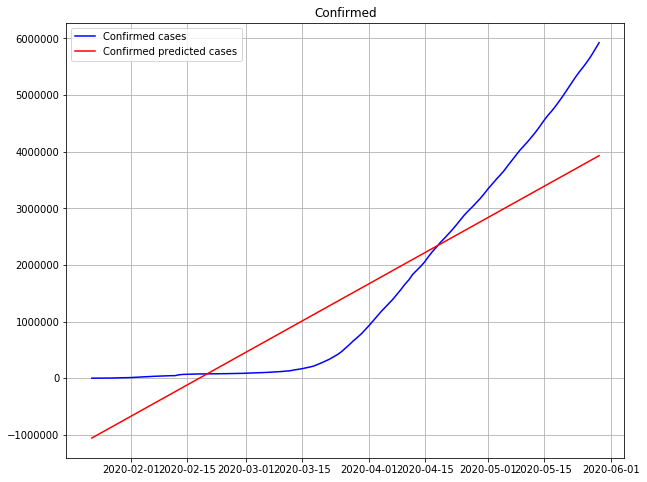

In [0]:
y_hat_lin = lin_reg.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_lin, 'Confirmed')

Polynomial regression

In [0]:
poly = PolynomialFeatures(degree = 10)
xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))
polyRegression = LinearRegression(normalize=True)
polyRegression.fit(xtrain_poly, train['Confirmed'])
predictions = polyRegression.predict(xvalid_poly)
rmse_poly = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error: ', rmse_poly)
x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
y_hat_poly = polyRegression.predict(x_poly)

Error:  173521.01736759904


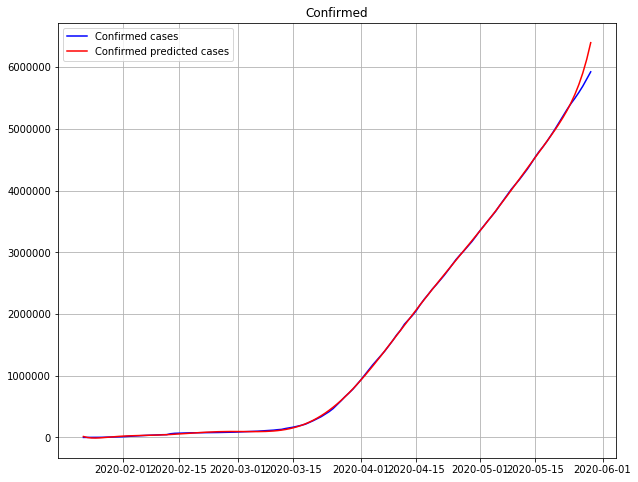

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_poly,'Confirmed')

Support vector machine

Error:  894367.6355027673


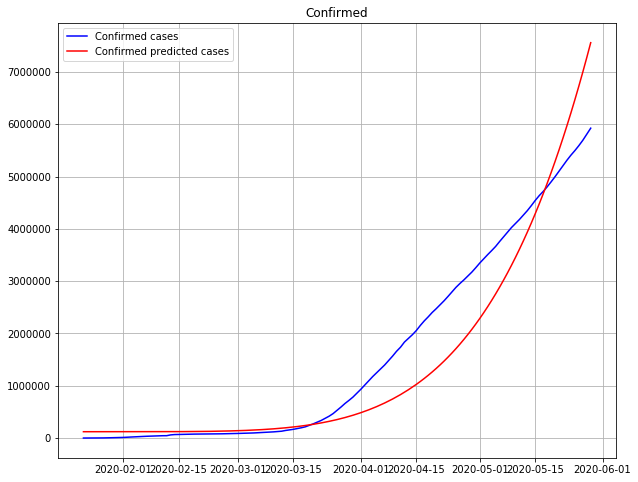

In [0]:
svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_svm = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_svm)
y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_svm,'Confirmed')

Lasso Model

In [0]:
lassoReg = LassoLars(alpha= 0.1)

In [0]:
lassoReg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [0]:
predictions = lassoReg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_lasso = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_lasso)

Error:  1624891.9739606008


In [0]:
y_hat_lasso = lassoReg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

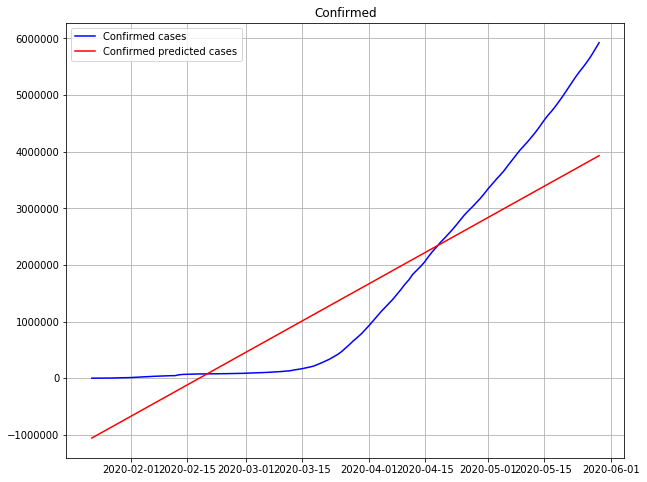

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_lasso,'Confirmed')

Esemble method : Random forest

In [0]:
forestReg =  RandomForestRegressor( random_state=0)

In [0]:
forestReg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
predictions = forestReg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_forest = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_forest)

Error:  804780.4783577094


In [0]:
y_hat_forest = forestReg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

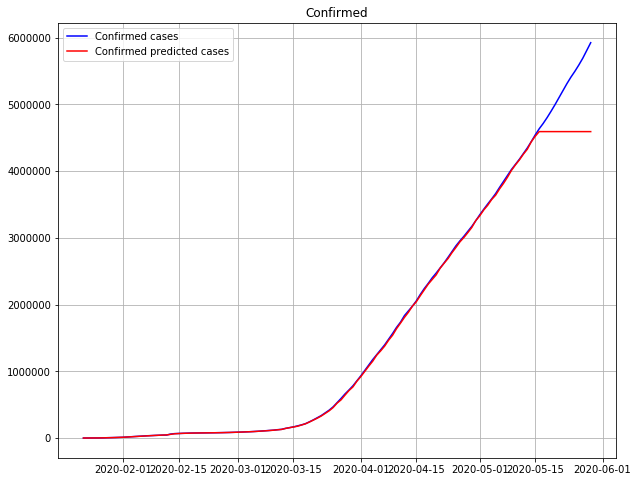

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_forest,'Confirmed')

Esemble method : Adam Boost 

Error:  863556.6955958552


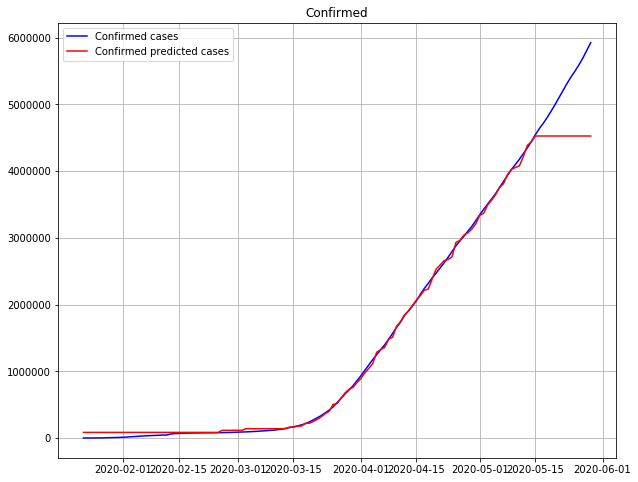

In [0]:
adam = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
adam.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = adam.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_adam = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_adam)
y_hat_adam = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_adam, 'Confirmed')

Neuronal Network

In [0]:
nn_reg = MLPRegressor(max_iter=1000,learning_rate='invscaling',
             learning_rate_init=10)

In [0]:
nn_reg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='invscaling',
             learning_rate_init=10, max_fun=15000, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions = nn_reg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_nn = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_nn)

Error:  126400.62447273861


In [0]:
y_hat_nn = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))

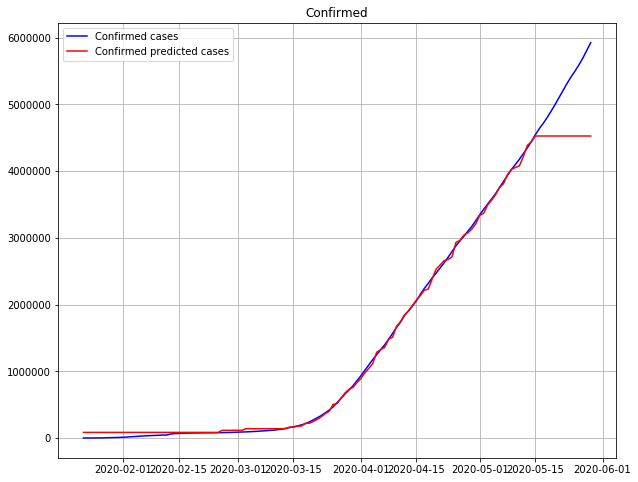

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_nn, 'Confirmed')

Facebook's prophet

In [0]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [0]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [0]:
forecast_c

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
141,2020-06-11
142,2020-06-12
143,2020-06-13
144,2020-06-14


In [0]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [0]:
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -9.974980e+03 -3.839546e+04  1.838039e+04
1   2020-01-23 -2.745910e+03 -2.919075e+04  2.597202e+04
2   2020-01-24  4.793243e+03 -2.237242e+04  3.293974e+04
3   2020-01-25  3.541534e+03 -2.413147e+04  2.843472e+04
4   2020-01-26  4.535275e+03 -2.294250e+04  2.893143e+04
..         ...           ...           ...           ...
141 2020-06-11  7.044247e+06  6.876425e+06  7.196056e+06
142 2020-06-12  7.141475e+06  6.959511e+06  7.307637e+06
143 2020-06-13  7.229913e+06  7.026348e+06  7.418512e+06
144 2020-06-14  7.320596e+06  7.092568e+06  7.526445e+06
145 2020-06-15  7.407570e+06  7.162768e+06  7.630651e+06

[146 rows x 4 columns]


Figure(720x432)


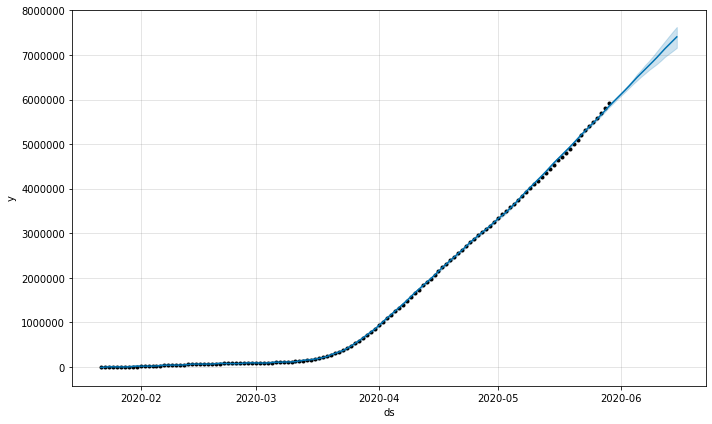

In [0]:
print(prophet_c.plot(confirmed_forecast))

In [0]:
prophet_rmse = np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))

In [0]:
print('Error: ', prophet_rmse)

Error:  13999.538789154965


we choose 4 models to apply to each country and each case. Those models are: Facebook's prophet, Polinomial regression, Ada boost and Support vector machine

In [0]:
def apply_fb_prophet(database, case, plot = True):
  prophet=Prophet(interval_width=0.95,weekly_seasonality=True)
  prophet_=pd.DataFrame(zip(list(database.index),list(database[case])),columns=['ds','y'])

  prophet.fit(prophet_)

  forecast=prophet.make_future_dataframe(periods=17)
  forecast_confirmed=forecast.copy()
  confirmed_forecast=prophet.predict(forecast)
  if plot:
    print(prophet.plot(confirmed_forecast))

  return prophet                 

In [0]:
def apply_poly(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  poly = PolynomialFeatures(degree = 10) 

  xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
  xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))

  polyRegression = LinearRegression(normalize=True)
  polyRegression.fit(xtrain_poly, train[case])

  predictions = polyRegression.predict(xvalid_poly)
  rmse_poly = np.sqrt(mean_squared_error(val[case],predictions))
  print('Error: ', rmse_poly)

  x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
  y_hat_poly = polyRegression.predict(x_poly) 
  if plot:
    plot_model(database.index, database[case], y_hat_poly, case)

  return polyRegression 

In [0]:
def apply_svm(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
  svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  
  predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_svm = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_svm)

  y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_svm, case)
  return svm

In [0]:
def apply_ada(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]  

  ada = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
  ada.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  predictions = ada.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_adam = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_adam)
  y_hat_adam = ada.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_adam, case)
  return ada

Applying each model to death and recovered cases

FACEBOOK PROPHET

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


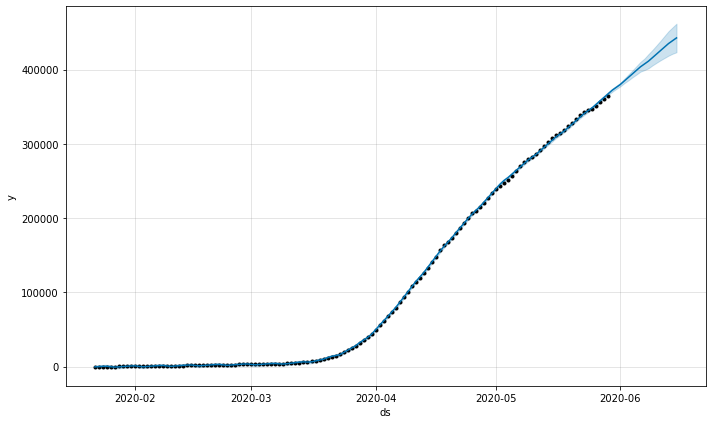

In [0]:
fb_death = apply_fb_prophet(datewise, 'Death')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


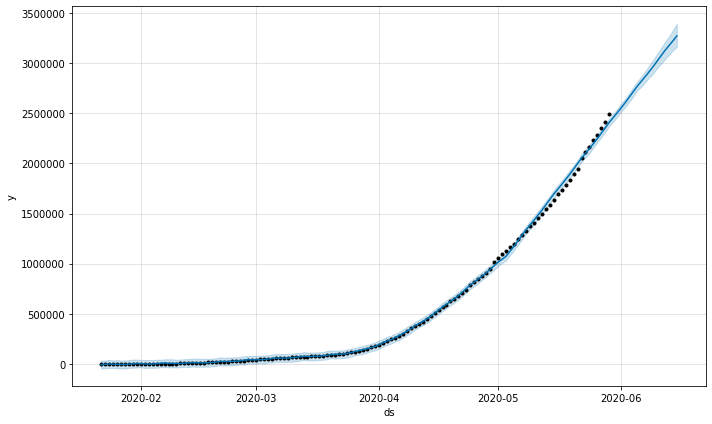

In [0]:
fb_recovered = apply_fb_prophet(datewise, 'Recovered')

POLYNOMIAL REGRESSOR

Error:  7834.673458825974


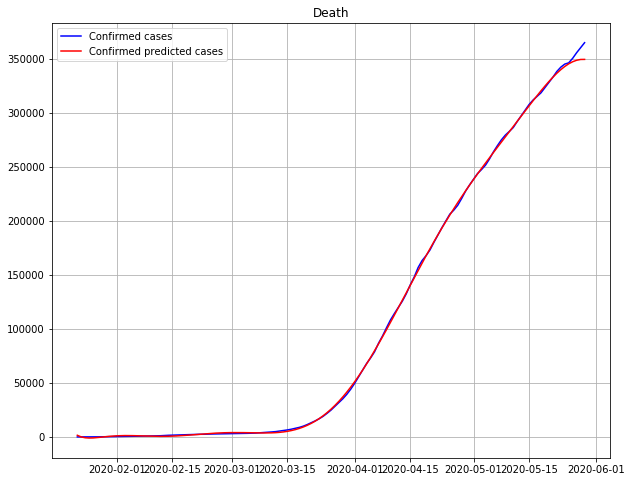

In [0]:
poly_death = apply_poly(datewise, 'Death')

Error:  220844.4803958192


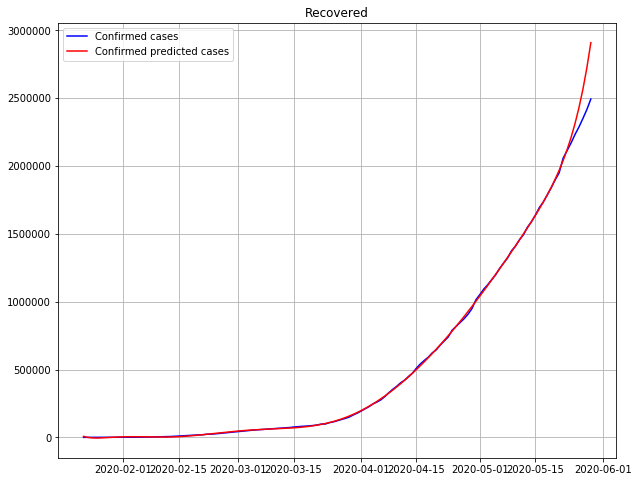

In [0]:
poly_recovered = apply_poly(datewise, 'Recovered')

SVM

Error:  193647.99283234


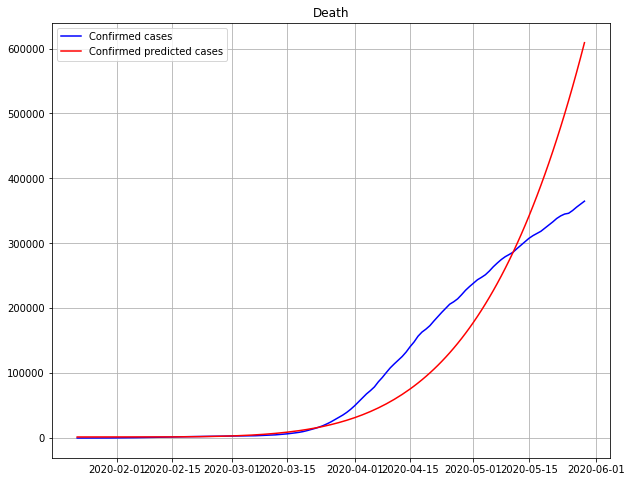

In [0]:
svm_death = apply_svm(datewise, 'Death')

Error:  224804.6291076389


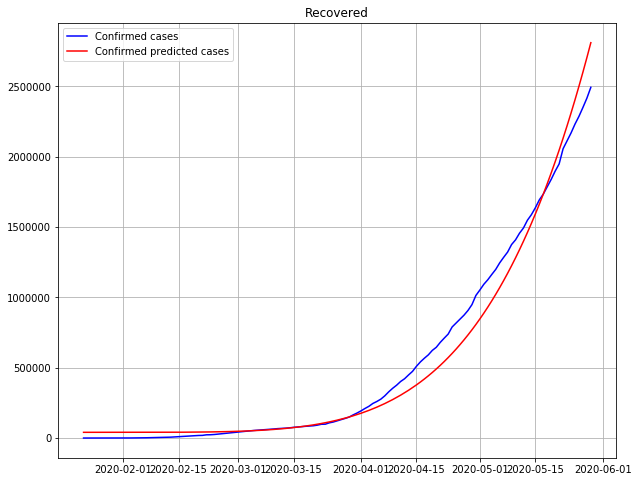

In [0]:
svm_recovered = apply_svm(datewise,'Recovered')

Ada boost

Error:  22248.109894192992


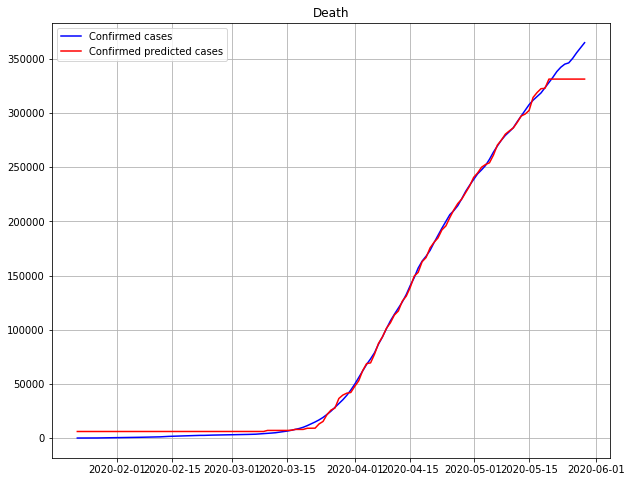

In [0]:
ada_death = apply_ada(datewise,'Death')

Error:  307548.98991795396


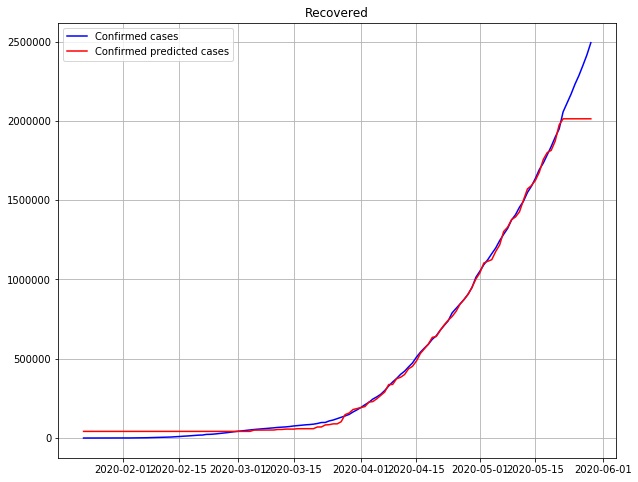

In [0]:
ada_recovered = apply_ada(datewise,'Recovered')

In [0]:
def make_datewise(country):
  datewise = pd.DataFrame()
  datewise['Date'] = all_dataframes['active'].index
  datewise['Recovered'] = all_dataframes['recovered'][country].values
  datewise['Confirmed'] = all_dataframes['confirmed'][country].values
  datewise['Death'] = all_dataframes['death'][country].values
  datewise['Active'] = all_dataframes['active'][country].values
  datewise['Closed'] = datewise['Recovered'] + datewise['Death']
  datewise = datewise.set_index('Date')
  datewise['Days since'] = datewise.index-datewise.index[0]
  datewise['Days since'] = datewise["Days since"].dt.days
  return datewise

In [0]:
all_datewise = {}
for country in countrywise.index:
  print('country: ', country)
  all_datewise[country] = make_datewise(country)

country:  Afghanistan
country:  Albania
country:  Algeria
country:  Andorra
country:  Angola
country:  Antigua and Barbuda
country:  Argentina
country:  Armenia
country:  Australia
country:  Austria
country:  Azerbaijan
country:  Bahamas
country:  Bahrain
country:  Bangladesh
country:  Barbados
country:  Belarus
country:  Belgium
country:  Belize
country:  Benin
country:  Bhutan
country:  Bolivia
country:  Bosnia and Herzegovina
country:  Botswana
country:  Brazil
country:  Brunei
country:  Bulgaria
country:  Burkina Faso
country:  Burma
country:  Burundi
country:  Cabo Verde
country:  Cambodia
country:  Cameroon
country:  Canada
country:  Central African Republic
country:  Chad
country:  Chile
country:  China
country:  Colombia
country:  Comoros
country:  Costa Rica
country:  Cote d'Ivoire
country:  Croatia
country:  Cuba
country:  Cyprus
country:  Czechia
country:  Democratic Republic of the Congo
country:  Denmark
country:  Diamond Princess
country:  Djibouti
country:  Dominica
coun

In [0]:
all_datewise

{'Afghanistan':             Recovered  Confirmed  Death  Active  Closed  Days since
 Date                                                               
 2020-01-22          0          0      0       0       0           0
 2020-01-23          0          0      0       0       0           1
 2020-01-24          0          0      0       0       0           2
 2020-01-25          0          0      0       0       0           3
 2020-01-26          0          0      0       0       0           4
 ...               ...        ...    ...     ...     ...         ...
 2020-05-25       1097      11173    219    9857    1316         124
 2020-05-26       1128      11831    220   10483    1348         125
 2020-05-27       1138      12456    227   11091    1365         126
 2020-05-28       1209      13036    235   11592    1444         127
 2020-05-29       1259      13659    246   12154    1505         128
 
 [129 rows x 6 columns],
 'Albania':             Recovered  Confirmed  Death  Active  

In [0]:
models_country = {}
for key, datewise in all_datewise.items():
  models_case = {}
  print('The country is: ', key)
  print('Facebook prophet for: ', key)
  models_case['Facebook Prophet Confirmed'] = apply_fb_prophet(datewise,'Confirmed', plot = False)
  models_case['Facebook Prophet Death'] = apply_fb_prophet(datewise,'Death', plot = False)
  models_case['Facebook Prophet Recovered'] = apply_fb_prophet(datewise,'Recovered', plot = False)

  
  print('Polinomial regressor for: ', key)
  models_case['Poly Confirmed'] = apply_poly(datewise,'Confirmed', plot = False)
  models_case['Poly Death'] = apply_poly(datewise,'Death', plot = False)
  models_case['Poly Recovered'] = apply_poly(datewise,'Recovered', plot = False)

  print('SVM regressor for: ', key)
  models_case['SVM Confirmed'] = apply_svm(datewise,'Confirmed', plot = False)
  models_case['SVM Death'] = apply_svm(datewise,'Death', plot = False)
  models_case['SVM Recovered'] = apply_svm(datewise,'Recovered', plot = False)

  print('AdaBoost regressor for: ', key)
  models_case['AdaBoost Confirmed'] = apply_ada(datewise,'Confirmed', plot = False)
  models_case['AdaBoost Death'] = apply_ada(datewise,'Death', plot = False)
  models_case['AdaBoost Recovered'] = apply_ada(datewise,'Recovered', plot = False)

  models_country[key] = models_case


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The country is:  Afghanistan
Facebook prophet for:  Afghanistan


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Afghanistan
Error:  1122.075749015572
Error:  28.574275867019995
Error:  50.871833211625315
SVM regressor for:  Afghanistan
Error:  3400.7861558043005
Error:  15.59480939570343
Error:  59.112573165266774
AdaBoost regressor for:  Afghanistan
Error:  3031.392924465583
Error:  28.735244660769563


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  180.4408725376345
The country is:  Albania
Facebook prophet for:  Albania


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Albania
Error:  69.53198826703522
Error:  30.952415213971893
Error:  86.52757881651213
SVM regressor for:  Albania
Error:  754.6971202093231
Error:  32.4345342572483
Error:  441.6486350218426
AdaBoost regressor for:  Albania
Error:  84.48082072455725
Error:  1.7158660870159501


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  56.744109546753585
The country is:  Algeria
Facebook prophet for:  Algeria


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Algeria
Error:  1146.478816332482
Error:  180.6424869319031
Error:  1634.7901641658098
SVM regressor for:  Algeria
Error:  2781.520230710574
Error:  388.1978469331255
Error:  343.5099720979147
AdaBoost regressor for:  Algeria
Error:  966.8905101197462
Error:  46.49831162460779


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  858.9812784541313
The country is:  Andorra
Facebook prophet for:  Andorra


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Andorra
Error:  386.6304375961576
Error:  12.14117972623384
Error:  165.99076414948942
SVM regressor for:  Andorra
Error:  748.0370118363718
Error:  45.08353342266053
Error:  369.58291276963155
AdaBoost regressor for:  Andorra
Error:  22.39958899849696
Error:  1.1904761904761898


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  39.859958937894184
The country is:  Angola
Facebook prophet for:  Angola


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Angola
Error:  40.579409914740374
Error:  5.603350648450108
Error:  7.3655437918734865
SVM regressor for:  Angola
Error:  14.892052074805704
Error:  0.3573597264982975
Error:  6.981120095779841
AdaBoost regressor for:  Angola
Error:  12.948398791990302
Error:  1.0
Error:  1.0
The country is:  Antigua and Barbuda
Facebook prophet for:  Antigua and Barbuda


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Antigua and Barbuda
Error:  13.225126962786218
Error:  4.218159468662557
Error:  4.393124159010345
SVM regressor for:  Antigua and Barbuda
Error:  25.008847351388926
Error:  2.723821315166461
Error:  12.830799152453734
AdaBoost regressor for:  Antigua and Barbuda
Error:  0.11111111111111073
Error:  0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  0.0
The country is:  Argentina
Facebook prophet for:  Argentina


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Argentina
Error:  1837.6704830754527
Error:  26.375750723300296
Error:  1802.8417081981702
SVM regressor for:  Argentina
Error:  1153.1422266329457
Error:  116.29617588792023
Error:  381.36691079415294
AdaBoost regressor for:  Argentina
Error:  3186.3617279311666
Error:  63.14722027588727


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  1245.7168013663256
The country is:  Armenia
Facebook prophet for:  Armenia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Armenia
Error:  1664.385306825459
Error:  4.166999618411449
Error:  1059.4446074889047
SVM regressor for:  Armenia
Error:  834.7927075303174
Error:  11.365788087552328
Error:  382.664859828636
AdaBoost regressor for:  Armenia
Error:  1775.602032605009
Error:  26.81683905949501


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  322.4371478066916
The country is:  Australia
Facebook prophet for:  Australia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Australia
Error:  7146.270398475867
Error:  51.207977213459564
Error:  5555.4228533584055
SVM regressor for:  Australia
Error:  7379.071450251815
Error:  99.62937576163183
Error:  5323.490458677928
AdaBoost regressor for:  Australia
Error:  243.88555333203558
Error:  3.875878237682546
Error:  244.43331865012559
The country is:  Austria
Facebook prophet for:  Austria


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Austria
Error:  12092.667163974465
Error:  14.488013762976133
Error:  7052.661025553141
SVM regressor for:  Austria
Error:  15195.139190568658
Error:  586.3765478466322
Error:  11709.93779123955
AdaBoost regressor for:  Austria
Error:  586.8108523086879
Error:  35.487321084220724


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  621.2430632595009
The country is:  Azerbaijan
Facebook prophet for:  Azerbaijan


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Azerbaijan
Error:  825.1479908338362
Error:  11.076086040613148
Error:  739.5217352379418
SVM regressor for:  Azerbaijan
Error:  534.8915488789532
Error:  8.53824377283846
Error:  240.91592779081196
AdaBoost regressor for:  Azerbaijan
Error:  757.4585325754991
Error:  8.119091258086884


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  525.1328608603422
The country is:  Bahamas
Facebook prophet for:  Bahamas


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Bahamas
Error:  9.140560970942703
Error:  0.2994254381473372
Error:  19.92399661484549
SVM regressor for:  Bahamas
Error:  83.68900265887865
Error:  10.029784119964171
Error:  17.464029807635768
AdaBoost regressor for:  Bahamas
Error:  6.469709642413858
Error:  0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  3.3511715807930513
The country is:  Bahrain
Facebook prophet for:  Bahrain


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Bahrain
Error:  2873.0752392448007
Error:  17.174582445235153
Error:  2954.6148471171055
SVM regressor for:  Bahrain
Error:  602.6807853471973
Error:  4.103485597882512
Error:  442.3574520219054
AdaBoost regressor for:  Bahrain
Error:  1364.457836266425
Error:  2.390457218668787


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  1087.7251766713534
The country is:  Bangladesh
Facebook prophet for:  Bangladesh


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Bangladesh
Error:  2472.5974806222157
Error:  178.95683691798953
Error:  1124.0723235802025
SVM regressor for:  Bangladesh
Error:  8246.422795323651
Error:  42.0324158793885
Error:  2629.3794456601945
AdaBoost regressor for:  Bangladesh
Error:  8274.751376881744
Error:  104.17792472496271


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  1682.568996674855
The country is:  Barbados
Facebook prophet for:  Barbados


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Barbados
Error:  62.92541648996521
Error:  1.1338023939544382
Error:  28.508197161561977
SVM regressor for:  Barbados
Error:  76.1941613235153
Error:  6.380446270880932
Error:  32.768071362817125
AdaBoost regressor for:  Barbados
Error:  3.5
Error:  0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  6.192529516196131
The country is:  Belarus
Facebook prophet for:  Belarus


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Belarus
Error:  731.4249082005998
Error:  33.86542917527185
Error:  964.6354330605567
SVM regressor for:  Belarus
Error:  5484.166822762768
Error:  45.93429347067882
Error:  2839.1587600311077
AdaBoost regressor for:  Belarus
Error:  4763.986107520998
Error:  24.145679547911882


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  3008.099515831026
The country is:  Belgium
Facebook prophet for:  Belgium


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Belgium
Error:  389.02862138578223
Error:  4112.902343241735
Error:  59.7467449505205
SVM regressor for:  Belgium
Error:  48762.552016515096
Error:  7317.68549223912
Error:  11903.344591477871
AdaBoost regressor for:  Belgium
Error:  2366.609354604515
Error:  398.8206771716859


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  544.5925741792909
The country is:  Belize
Facebook prophet for:  Belize


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Belize
Error:  16.30886312752622
Error:  1.7801690254272442
Error:  26.581339363691026
SVM regressor for:  Belize
Error:  18.005524176418916
Error:  1.8100711372952194
Error:  7.773045248801996
AdaBoost regressor for:  Belize
Error:  0.0
Error:  0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  0.0
The country is:  Benin
Facebook prophet for:  Benin


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Benin
Error:  949.0010384192213
Error:  7.821409731308366
Error:  221.78819939668702
SVM regressor for:  Benin
Error:  68.69909375882067
Error:  0.7673444789335608
Error:  24.133255718623108
AdaBoost regressor for:  Benin
Error:  70.89932500182414
Error:  0.0
Error: 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 55.637875518749446
The country is:  Bhutan
Facebook prophet for:  Bhutan


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Bhutan
Error:  53.12269833336876
Error:  0.0
Error:  12.884832370945569
SVM regressor for:  Bhutan
Error:  0.9721058951278462
Error:  0.0
Error:  3.5688441828542943
AdaBoost regressor for:  Bhutan
Error: 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 6.959063976467771
Error:  0.0
Error:  0.0
The country is:  Bolivia
Facebook prophet for:  Bolivia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Bolivia
Error:  217.9444321488354
Error:  54.15736137547207
Error:  288.39439944871043
SVM regressor for:  Bolivia
Error:  2226.554374483427
Error:  37.50780109553721
Error:  135.45263642346256
AdaBoost regressor for:  Bolivia
Error:  2012.7419621872064
Error:  49.999642855867336


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  125.56964081288733
The country is:  Bosnia and Herzegovina
Facebook prophet for:  Bosnia and Herzegovina


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Bosnia and Herzegovina
Error:  672.9188694944767
Error:  15.107303936978042
Error:  548.3857167149513
SVM regressor for:  Bosnia and Herzegovina
Error:  1807.6523296558375
Error:  61.469265349764775
Error:  407.23629368180406
AdaBoost regressor for:  Bosnia and Herzegovina
Error:  122.88955137331547
Error:  12.007013256715387


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  147.1920167533496
The country is:  Botswana
Facebook prophet for:  Botswana


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Botswana
Error:  1.8427338116771854
Error:  2.3129734329049776
Error:  8.635241995106366
SVM regressor for:  Botswana
Error:  11.813043515006253
Error:  0.9843451931111529
Error:  3.196515363628476
AdaBoost regressor for:  Botswana
Error:  4.6291004988627575
Error:  0.0
Error:  0.7559289460184544
The country is:  Brazil
Facebook prophet for:  Brazil


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Brazil
Error:  63136.59279040019
Error:  1526.5976867846812
Error:  7618.117760810277
SVM regressor for:  Brazil
Error:  77066.02033050754
Error:  2426.5201379077544
Error:  33680.11225697831
AdaBoost regressor for:  Brazil
Error:  83580.33661461434
Error:  4496.235238418518


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  33116.49055626689
The country is:  Brunei
Facebook prophet for:  Brunei


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Polinomial regressor for:  Brunei
Error:  17.591862576959898
Error:  1.9460178083258954
Error:  98.85450968368218
SVM regressor for:  Brunei
Error:  154.38896323532265
Error:  0.6535745728586955
Error:  130.95472727749518
AdaBoost regressor for:  Brunei
Error:  1.75
Error:  0.6546536707079771


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Error:  4.077830087785916
The country is:  Bulgaria
Facebook prophet for:  Bulgaria


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Data Visualization

## Static Data Visualization (Matplotlib)

In [0]:
# temporarily markdown

for i in df_confirmed:
  print("The country is:", i)
  plt.figure()
  plt.plot(df_confirmed.index, df_confirmed[i], color = "b", label = "Confirmed Cases");
  plt.plot(df_active.index, df_active[i], color = "y", label = "Active Cases");
  plt.plot(df_death.index, df_death[i], color = "r", label = "Death Cases");
  plt.plot(df_recovered.index, df_recovered[i], color = "g", label = "Recovered Cases");
  plt.legend(loc = "best")
  plt.show()

## Interactive Data Visualization <br>


### World Map (temporarily deleted)


### Interactive Plotting

#### Using Bokeh and ipywidgets

In [0]:
# line plot - multiple lines

import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d, Span, Label
from bokeh.layouts import layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

import warnings
warnings.filterwarnings('ignore')

output_notebook()
############################################################################
#Widgets:

#Dropdown Widget:
drop_down = widgets.Dropdown(options=all_dataframes['confirmed'].columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

#Selection Range Slider Widget:
#range_slider= widgets.SelectionRangeSlider(
#    options=all_dataframes["confirmed"].index,
#    index=(0, 124),
#    description='Timeframe',
#    disabled=False
#)

# create slider
#dates = list(pd.date_range(all_dataframes["confirmed"].index.min(), all_dataframes["confirmed"].index.max(), freq='D'))
#options = [(i.strftime('%Y-%m-%d'), i) for i in dates]
#index = (0, len(dates)-1)
#myslider = widgets.SelectionRangeSlider(
#    options = options,
#    index = index,
#    description = 'Timeframe:',
#    orientation = 'horizontal',
#    layout={'width': '800px'}
#)
checkbox_confirmed = widgets.Checkbox(
    value=True,
    description='Show Confirmed Cases',
    disabled=False,
    indent=False
)
checkbox_active = widgets.Checkbox(
    value=False,
    description='Show Active Cases',
    disabled=False,
    indent=False
)

checkbox_recovered = widgets.Checkbox(
    value=False,
    description='Show Recovered Cases',
    disabled=False,
    indent=False
)

checkbox_death = widgets.Checkbox(
    value=False,
    description='Show Death Cases',
    disabled=False,
    indent=False
)

startdatepicker = widgets.DatePicker(
    description='Pick a Startdate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = all_dataframes["confirmed"].index[0]
)

enddatepicker = widgets.DatePicker(
    description='Pick an Enddate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = projection_dataframes["Germany"].index[-1]
)

#projection_includer = widgets.Checkbox(
#    value=True,
#    description='Show projections?',
#    disabled=False,
#    indent=True
#)


toggle_projections = widgets.ToggleButton(
    value=False,
    description='Show Projections',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Do you want to include projections in the plot?',
    icon='check' # (FontAwesome names without the `fa-` prefix) #check
)
#Multi-Select Widget:

#multi_select = widgets.SelectMultiple(options=all_dataframes.keys(),
#    value=['confirmed'],
#    #rows=10,
#    description='Counts:',
#    disabled=False
#)
############################################################################

############################################################################
#plotting function
def plot_country(country, startdate, enddate, 
                 confirmed, active, recovered, death,
                 #projection_confirmed = True
                 include_projection = False,):

  #plot setup: 
  multi_line_plot = figure(plot_width=900, plot_height=425, title='Covid-19 Cases in {}'.format(country), 
                           x_axis_label='Date', y_axis_label='No. of Cases in {}'.format(country),
                           x_axis_type='datetime', y_axis_type = "linear")
  multi_line_plot.title.text_font_size = "35px"
  multi_line_plot.title.align = "center"

  multi_line_plot.left[0].formatter.use_scientific = False
    
  #data lines:
  if confirmed == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['confirmed'],
                       color='black', line_width=2, line_dash = "dashed", legend = "Confirmed Cases")
  if active == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['active'],
                       color='blue', line_width=2, legend = "Active Cases")
  if recovered == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['recovered'],
                       color='green', line_width=2, legend = "Recovered Cases")
  if death == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['death'],
                       color='red', line_width=2, legend = "Death Cases")
        
  #projection lines:
  if include_projection == True:
    if confirmed == True:
        multi_line_plot.line(projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True].index,
                             projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True]["Total Cases"], 
                             legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
    if active == True:
        multi_line_plot.line(projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True].index,
                             projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True]["Active Cases"], 
                             legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
    if recovered == True:
        multi_line_plot.line(projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True].index,
                             projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True]["Recovered Cases"], 
                             legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
    if death == True:
        multi_line_plot.line(projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True].index,
                             projection_dataframes[country]
                             .loc[projection_dataframes[country]['Prediction']==True]["Death Cases"], 
                             legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
    
  multi_line_plot.x_range = Range1d(startdate, enddate)
  
  #add vertical line  
  projection_beginning = all_dataframes['confirmed'].index.max()
  beginning_of_projection = Span(location=projection_beginning,
                            dimension='height', line_color='orange',
                            line_dash='dashed', line_width=1, 
                            name = "Beginning of Projection") 
  multi_line_plot.add_layout(beginning_of_projection)

    
  # add hover tool
  hover = HoverTool()
  hover.tooltips = [('Date','@Date{%F}'),('No. of Cases','@{}'.format(country))]
  hover.formatters = {'Date': 'datetime'} 
  multi_line_plot.add_tools(hover)

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"
  multi_line_plot.legend.background_fill_alpha = 0.35

  show(multi_line_plot)
############################################################################

############################################################################
#Interact function:
interact(plot_country, country = drop_down, startdate = startdatepicker, enddate = enddatepicker,
         confirmed = checkbox_confirmed, active = checkbox_active, 
         recovered = checkbox_recovered, death = checkbox_death,
         include_projection = toggle_projections);
############################################################################


#The Hover Tool does not work yet for the predictions

Loading BokehJS ...

interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

In [0]:
projection_dataframes["Germany"]

Germany,Total Cases,New Cases,R_7,Prediction,Death Cases,Recovered Cases,Active Cases,Recovered Rate,Death Rate
Date,,,,,,,,,
2020-01-22,0.000000,NaN,NaN,False,0.000000,0.000000,0.000000,NaN,NaN
2020-01-23,0.000000,0.000000,NaN,False,0.000000,0.000000,0.000000,NaN,NaN
2020-01-24,0.000000,0.000000,NaN,False,0.000000,0.000000,0.000000,NaN,NaN
2020-01-25,0.000000,0.000000,NaN,False,0.000000,0.000000,0.000000,NaN,NaN
2020-01-26,0.000000,0.000000,NaN,False,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-06-14,188303.939834,287.506495,0.793282,True,8905.753669,173183.791764,6214.394401,0.067504,0.041248
2020-06-15,188492.430587,188.490753,0.793282,True,8916.973073,173603.287346,5972.170167,0.067504,0.041248
2020-06-16,188594.215594,101.785007,0.793282,True,8941.721759,174006.431858,5646.061976,0.067504,0.041248


#### Using Bokeh with its own dropdown widget

In [0]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [0]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    rows=3,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), rows=3, value=('Orang…

In [0]:
# temporarily markdown

#different approach: Here, I try to use bokeh's own dropdown widget instead of the ipywidgets dropdown widget

from bokeh.io import output_file, show, push_notebook
from bokeh.models import Dropdown
from bokeh.layouts import column, row

menu = list(df_confirmed.columns)
dropdown = Dropdown(label="Country Selection", button_type="warning", menu=menu, value="Germany")

#dropdown.js_link("value", multi_line_plot, "country")
#here I have to write a javascript link to link a change in the dropdown to a change in the graph, which I can't do

show(row(line_plot, dropdown))

### using ipywidgets

In [0]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
import matplotlib.dates as mdates

#dstart = df_confirmed.index[startdate]
#dend = df_confirmed.index[enddate]

def country_visualization(country):#, startdate, enddate):
  #plt.figure()
  fig, ax = plt.subplots(figsize = [18.5, 6.5], dpi = 200, facecolor = "WhiteSmoke")
  ax.plot(all_dataframes['confirmed'].index, all_dataframes['confirmed'][country], color = "black", linestyle = "dashed", linewidth = 2, label = "Confirmed Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  #plt.xlim(pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00'))
  #plt.xlim(xlim((left, right)))
  ax.set_xticks(all_dataframes['confirmed'].index)
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
  ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
  _=plt.xticks(rotation=90)
  #plt.xlim(df_confirmed.index[startdate], df_confirmed.index[enddate])
  #plt.xlim([df_confirmed.index[startdate], df_confirmed.index[enddate]])
  ax.plot(all_dataframes['active'].index, all_dataframes['active'][country], color = "b", linestyle = "-", linewidth = 2, label = "Active Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  ax.plot(all_dataframes['death'].index, all_dataframes['death'][country], color = "r", linestyle = "-", linewidth = 2, label = "Death Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  ax.plot(all_dataframes['recovered'].index, all_dataframes['recovered'][country], color = "g", linestyle = "-", linewidth = 2, label = "Recovered Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  #plt.xlim(pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00'))
  ax.legend(loc = "best");
  plt.xlabel('Date')
  plt.ylabel('No. of Cases')
  plt.title('Covid-19 Cases in {}'.format(country))
  #plt.set_xlim([df_confirmed.index[startdate], df_confirmed.index[enddate]])
  plt.show();

interactive_plot = interact(country_visualization, country = all_dataframes['confirmed'].columns)#, startdate = all_dataframes['confirmed'].index, enddate = all_dataframes['confirmed'].index)
interactive_plot;

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [0]:
import datetime
dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0, 11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …